# Crime data Exploration: Seattle and San Francisco
# Cars are crime object number one in both cities being either stolen or stolen into. 

### My initial goal is to explore the offense number and types as well as their time and location distribution in both cities using python through a Jupyter notebook.
### I will then compare some of the most occuring crimes in both cities using python and the Google Fusion Tables.

# I: Data Processing

In [74]:
import matplotlib
import pylab
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
import calendar
from collections import OrderedDict
import collections
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

#processing of seattle file for high level results
myFile=open('seattle_incidents_summer_2014.csv')

# variable initialization
crimeTypeSea=[]
crimeTotSea=0
dateDictSea={}
daySea=[]
timeSea=[]
monTimeSea=[]
friTimeSea=[]
crimeCountSea={}
districtSea={}
crimeDictSea={}

for line in myFile :
    if not line.startswith('RMS CDW ID'):
        arrayValue=line.split(',')
        timeToConv=arrayValue[8]
        # dictionary for types of crime and count
        if arrayValue[4] not in crimeDictSea:
            crimeDictSea[arrayValue[4]]=1
            crimeTotSea+=1
        elif arrayValue[4] in crimeDictSea:
            crimeDictSea[arrayValue[4]]+=1
            crimeTotSea+=1
        # turning time to a 24 hours timeframe for comparison with San Francisco
        if 'AM' in timeToConv:
            toManipulate=timeToConv.split(' ')
            dateToConv=toManipulate[0]
            timeToConv=toManipulate[1]
            finalDate=datetime.datetime.strptime(dateToConv, '%m/%d/%Y').strftime('%A')
            timeArrayed=timeToConv.split(':')
            finalTime=float(str(timeArrayed[0])+"."+str(timeArrayed[1]))
        if 'PM' in timeToConv:
            toManipulate=timeToConv.split(' ')
            dateToConv=toManipulate[0]
            finalDate=datetime.datetime.strptime(dateToConv, '%m/%d/%Y').strftime('%A')
            timeToConv=toManipulate[1]
            timeArrayed=timeToConv.split(':')
            finalTime=float(str(timeArrayed[0])+"."+str(timeArrayed[1]))+12
        if dateToConv not in dateDictSea:
            dateDictSea[dateToConv]=1
        if finalDate=='Monday':
            x=0
            y = np.random.randn(1)
            x+=(y/10)
            #adding crime times as float entities for plotting later
            daySea.append(float(x))
            #dictionary for crime by time of day and day of week
            if finalDate not in crimeCountSea:
                crimeCountSea[finalDate]=1
            elif crimeCountSea[finalDate] not in crimeCountSea:
                crimeCountSea[finalDate]+=1
            # adding time for a mon to fri comparison plot
            monTimeSea.append(finalTime)
        if finalDate=='Tuesday':
            x=1
            y = np.random.randn(1)
            x+=(y/10)
            daySea.append(float(x))
            if finalDate not in crimeCountSea:
                crimeCountSea[finalDate]=1
            elif crimeCountSea[finalDate] not in crimeCountSea:
                crimeCountSea[finalDate]+=1
        if finalDate=='Wednesday':
            x=2
            y = np.random.randn(1)
            x+=(y/10)
            daySea.append(float(x))
            if finalDate not in crimeCountSea:
                crimeCountSea[finalDate]=1
            elif crimeCountSea[finalDate] not in crimeCountSea:
                crimeCountSea[finalDate]+=1
        if finalDate=='Thursday':
            x=3
            y = np.random.randn(1)
            x+=(y/10)
            daySea.append(float(x))
            if finalDate not in crimeCountSea:
                crimeCountSea[finalDate]=1
            elif crimeCountSea[finalDate] not in crimeCountSea:
                crimeCountSea[finalDate]+=1
        if finalDate=='Friday':
            x=4
            y = np.random.randn(1)
            x+=(y/10)
            friTimeSea.append(finalTime)
            daySea.append(float(x))
            if finalDate not in crimeCountSea:
                crimeCountSea[finalDate]=1
            elif crimeCountSea[finalDate] not in crimeCountSea:
                crimeCountSea[finalDate]+=1
        if finalDate=='Saturday':
            x=5
            y = np.random.randn(1)
            x+=(y/10)
            daySea.append(float(x))
            if finalDate not in crimeCountSea:
                crimeCountSea[finalDate]=1
            elif crimeCountSea[finalDate] not in crimeCountSea:
                crimeCountSea[finalDate]+=1
        if finalDate=='Sunday':
            x=6
            y = np.random.randn(1)
            x+=(y/10)
            daySea.append(float(x))
            if finalDate not in crimeCountSea:
                crimeCountSea[finalDate]=1
            elif crimeCountSea[finalDate] not in crimeCountSea:
                crimeCountSea[finalDate]+=1
        timeSea.append(finalTime)
        district=arrayValue[11]
        if district not in districtSea:
            districtSea[district]=1
        elif district in districtSea:
            districtSea[district]+=1

# processing of San Francisco File for high level results
myFile2=open('sanfrancisco_incidents_summer_2014.csv')

# variable initialization
crimeTypeSF=[]
crimeDictSF={}
crimeTotSF=0
crimeCountSF={}
dateDictSF={}
daySF=[]
timeSF=[]
monTimeSF=[]
friTimeSF=[]
districtSF={}

#data extraction
for line in myFile2 :
    if not line.startswith('IncidntNum'):
        arrayValue=line.split(',')
        crimeTypeSF.append(arrayValue[2])
        timeConv=str(arrayValue[5])
        timeConv=float(timeConv.replace(':','.'))
        if arrayValue[2] not in crimeDictSF:
            crimeDictSF[arrayValue[2]]=1
            crimeTotSF+=1
        elif arrayValue[2] in crimeDictSF:
            crimeDictSF[arrayValue[2]]+=1
            crimeTotSF+=1
        if arrayValue[4] not in dateDictSF:
            dateDictSF[arrayValue[4]]=1
        if arrayValue[3]=='Monday':
            x=0
            y = np.random.randn(1)
            x+=(y/10)
            daySF.append(float(x))
            if arrayValue[3] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]=1
            elif crimeCountSF[arrayValue[3]] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]+=1
            monTimeSF.append(timeConv)
        if arrayValue[3]=='Tuesday':
            x=1
            y = np.random.randn(1)
            x+=(y/10)
            daySF.append(float(x))
            if arrayValue[3] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]=1
            elif crimeCountSF[arrayValue[3]] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]+=1
        if arrayValue[3]=='Wednesday':
            x=2
            y = np.random.randn(1)
            x+=(y/10)
            daySF.append(float(x))
            if arrayValue[3] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]=1
            elif crimeCountSF[arrayValue[3]] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]+=1                
        if arrayValue[3]=='Thursday':
            x=3
            y = np.random.randn(1)
            x+=(y/10)
            daySF.append(float(x))
            if arrayValue[3] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]=1
            elif crimeCountSF[arrayValue[3]] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]+=1
        if arrayValue[3]=='Friday':
            x=4
            y = np.random.randn(1)
            x+=(y/10)
            daySF.append(float(x))
            if arrayValue[3] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]=1
            elif crimeCountSF[arrayValue[3]] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]+=1
            friTimeSF.append(timeConv)
        if arrayValue[3]=='Saturday':
            x=5
            y = np.random.randn(1)
            x+=(y/10)
            daySF.append(float(x))
            if arrayValue[3] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]=1
            elif crimeCountSF[arrayValue[3]] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]+=1
        if arrayValue[3]=='Sunday':
            x=6
            y = np.random.randn(1)
            x+=(y/10)
            daySF.append(float(x))
            if arrayValue[3] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]=1
            elif crimeCountSF[arrayValue[3]] not in crimeCountSF:
                crimeCountSF[arrayValue[3]]+=1

        timeSF.append(timeConv)
        district=arrayValue[6]
        if district not in districtSF:
            districtSF[district]=1
        elif district in districtSF:
            districtSF[district]+=1

# II: High level overview
## 1. Daily crime rates: higher criminality in Seattle

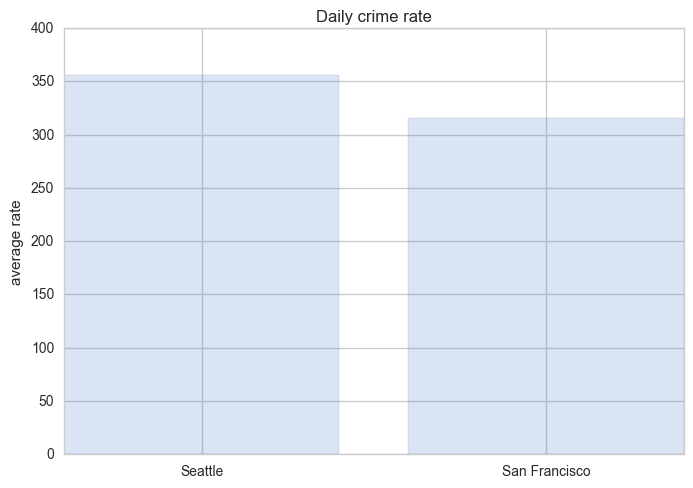

In [75]:
#Daily crime rates calculation
dailyRateSF=crimeTotSF/len(dateDictSF)
dailyRateSea=crimeTotSea/len(dateDictSea)

#plot of daily crime rate
barValueDaily=[]
barValueDaily.append(dailyRateSea)
barValueDaily.append(dailyRateSF)
barNameDaily=[]
barNameDaily.append('Seattle')

barNameDaily.append('San Francisco')
y_pos = np.arange(len(barNameDaily))
plt.bar(y_pos, barValueDaily, align='center', alpha=0.2)
plt.xticks(y_pos, barNameDaily)
plt.ylabel('average rate')
plt.title('Daily crime rate')
plt.show()

##### The daily crime rate is higher in Seattle than San Francisco 

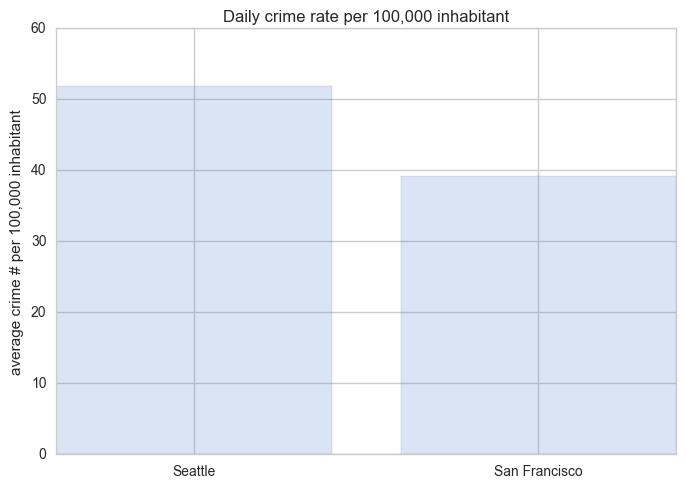

In [76]:
# crime # per 100,000 inhabitant population taken from wikipedia 2015 or 2016 census
dailyRateSFPop=(dailyRateSF/805235)*100000
dailyRateSeaPop=(dailyRateSea/686800)*100000

barValueDaily=[]
barValueDaily.append(dailyRateSeaPop)
barValueDaily.append(dailyRateSFPop)
barNameDaily=[]
barNameDaily.append('Seattle')

barNameDaily.append('San Francisco')
y_pos = np.arange(len(barNameDaily))
plt.bar(y_pos, barValueDaily, align='center', alpha=0.2)
plt.xticks(y_pos, barNameDaily)
plt.ylabel('average crime # per 100,000 inhabitant')
plt.title('Daily crime rate per 100,000 inhabitant')
plt.show()

#### The daily crime rate which takes into account the city population, further emphasizes a higher crime rate in Seattle.

## 2. Overview of crimes in San Francisco
### a. Daily distribution of crimes

{'Monday': 4005, 'Wednesday': 4102, 'Saturday': 4319, 'Thursday': 3968, 'Sunday': 4218, 'Friday': 4451, 'Tuesday': 3930}


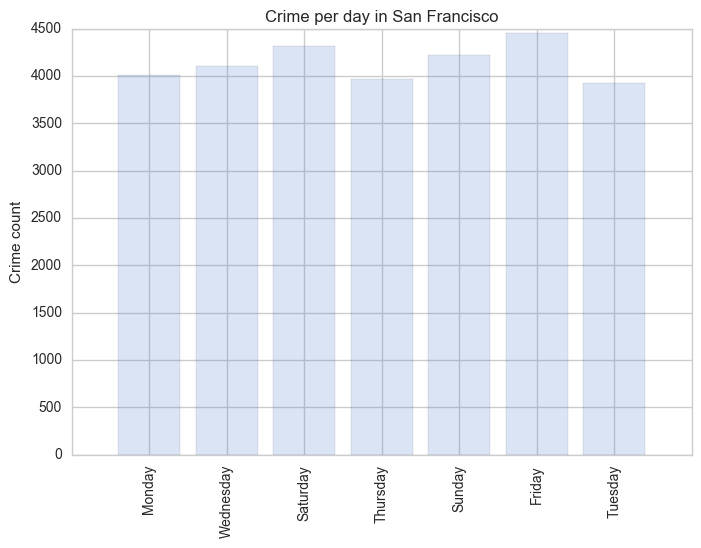

In [77]:
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
dayLabelSF=[]
dayCountSF=[]
print(crimeCountSF)
for k in crimeCountSF:
    dayLabelSF.append(k)
    dayCountSF.append(crimeCountSF[k])
y_pos = np.arange(len(dayLabelSF))
plt.bar(y_pos, dayCountSF, align='center', alpha=0.2)
plt.xticks(y_pos, dayLabelSF,rotation='vertical')
plt.ylabel('Crime count')
plt.title('Crime per day in San Francisco')
plt.show()

#### Overall we can see little variation in the distributions of crimes per day of the week as we range from 3930 on Tuesday to 4451 on Friday.

### b. Crime Distribution per day of the week and time

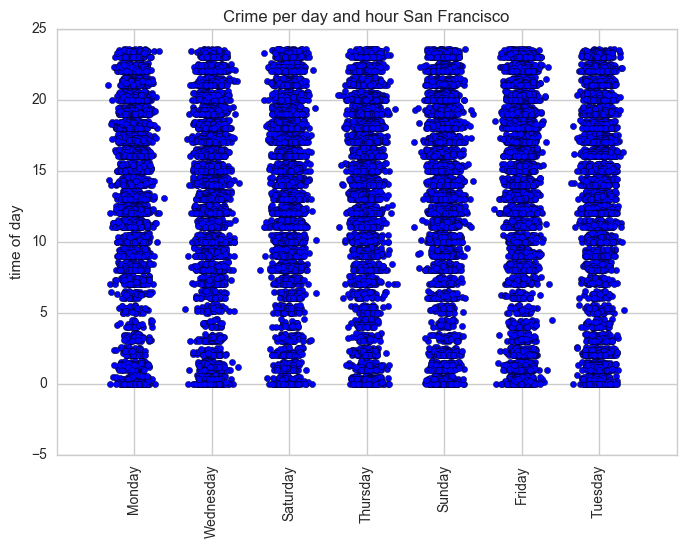

In [78]:
plt.scatter(daySF, timeSF)
plt.ylabel('time of day')
plt.xticks(y_pos, dayLabelSF,rotation='vertical')
plt.title('Crime per day and hour San Francisco')
plt.show()

#### The distribution of crimes per hours shows a strong decrease in the early of the night time (1 to 6 am) and then increases stably in the rest of the day
#### This past midnight decrease is shifted on the weekend to a later time frame (3 to 8 am)

#### This is confirmed by the violin plot here under

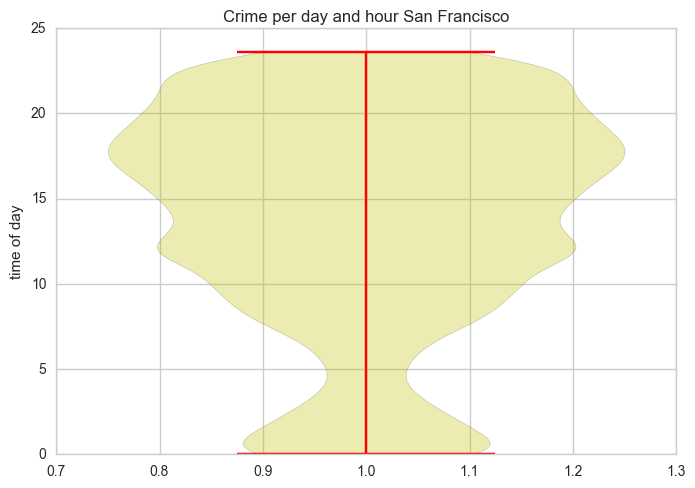

In [79]:
plt.violinplot(timeSF)
plt.ylabel('time of day')
plt.title('Crime per day and hour San Francisco')
plt.show()

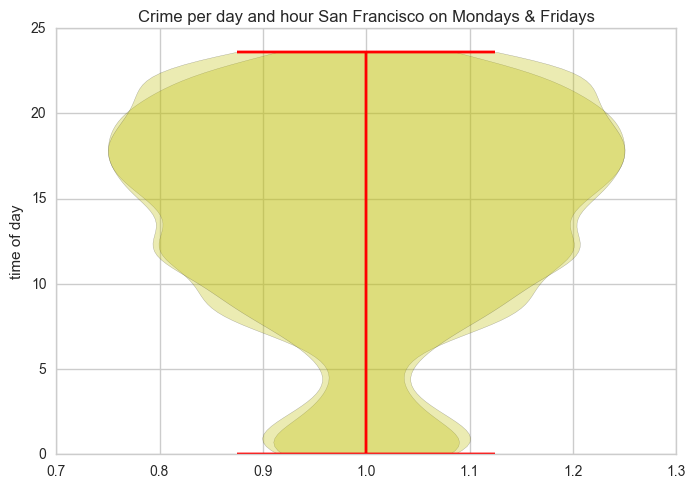

In [80]:
plt.violinplot(monTimeSF)
plt.violinplot(friTimeSF)
plt.ylabel('time of day')
plt.title('Crime per day and hour San Francisco on Mondays & Fridays')
plt.show()

#### We can see here that there are slightly more offenses happening late at night on Fridays than on Mondays

### c. Crime per District in San Francisco

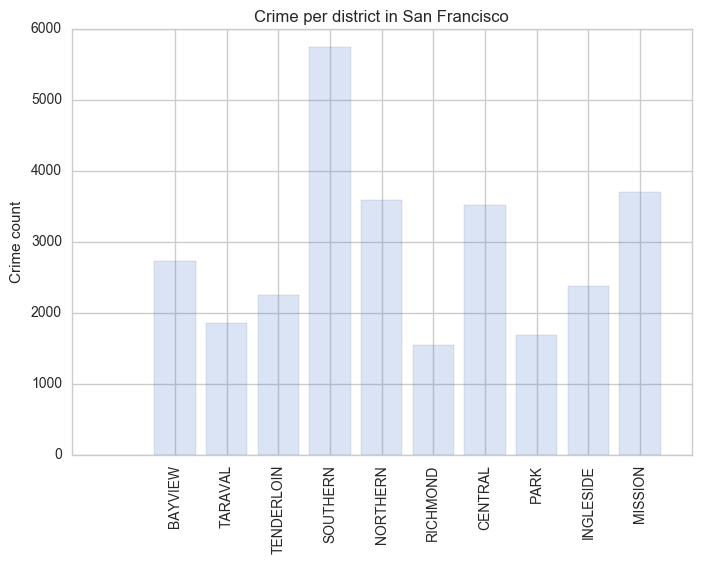

In [81]:
disLabelSF=[]
disCountSF=[]
for k in districtSF:
    disLabelSF.append(k)
    disCountSF.append(districtSF[k])
y_pos = np.arange(len(disLabelSF))
plt.bar(y_pos, disCountSF, align='center', alpha=0.2)
plt.xticks(y_pos, disLabelSF,rotation='vertical')
plt.ylabel('Crime count')
plt.title('Crime per district in San Francisco')
plt.show()

#### The district in which more crimes are committed is Southern.
##### I did not look into factoring the number of inhabitants per district, due to time reasons


## 2. Overview of crimes in Seattle
### a. Daily distribution of crimes

{'Monday': 4587, 'Wednesday': 4662, 'Saturday': 4647, 'Thursday': 4596, 'Sunday': 4715, 'Friday': 4960, 'Tuesday': 4612}


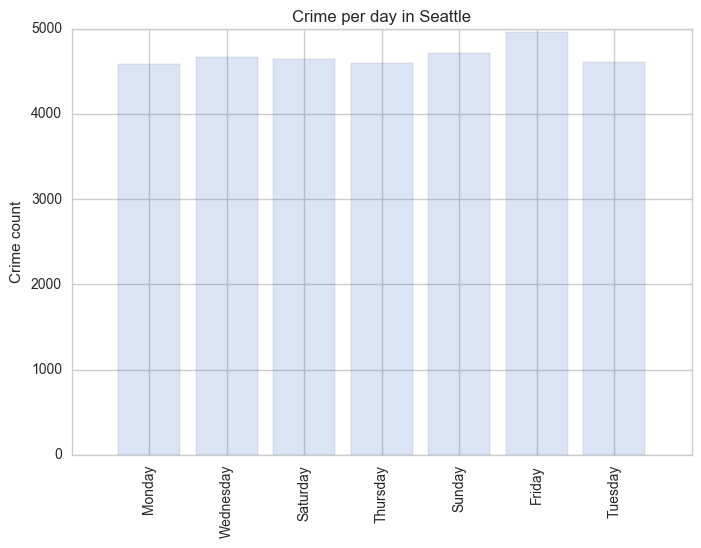

In [82]:
dayLabelSea=[]
dayCountSea=[]
print(crimeCountSea)
for k in crimeCountSea:
    dayLabelSea.append(k)
    dayCountSea.append(crimeCountSea[k])
y_pos = np.arange(len(dayLabelSea))
plt.bar(y_pos, dayCountSea, align='center', alpha=0.2)
plt.xticks(y_pos, dayLabelSea,rotation='vertical')
plt.ylabel('Crime count')
plt.title('Crime per day in Seattle')
plt.show()

#### The distribution of crime per day of the week is stable. The range is between 4596 on Thursday and 4960 on Friday.

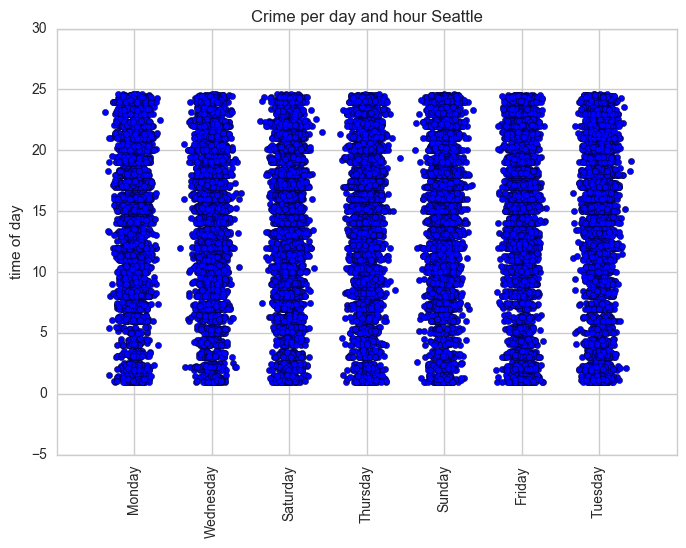

In [83]:
plt.scatter(daySea, timeSea)#, alpha=0.5)
plt.xticks(y_pos, dayLabelSea,rotation='vertical')
plt.ylabel('time of day')
plt.title('Crime per day and hour Seattle')
plt.show()

#### The plot is more crowded and no clear information can be taken away. The violin plot here under helps.

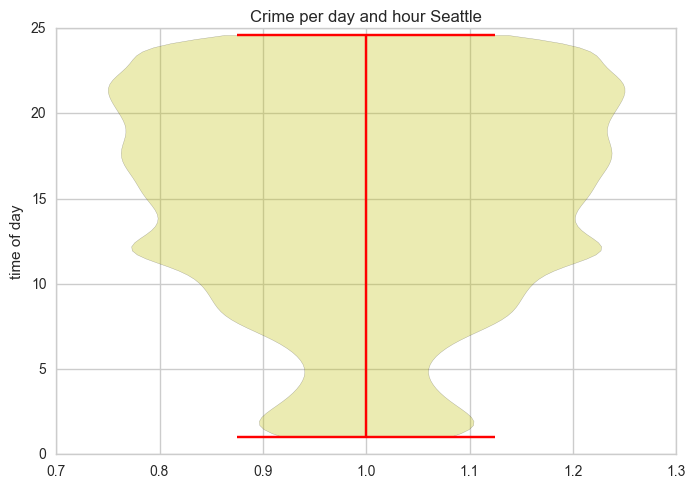

In [84]:
plt.violinplot(timeSea)#, timeSea)#, data=tips)
#plt.xticks(y_pos, dayLabelSea,rotation='vertical')
plt.ylabel('time of day')
plt.title('Crime per day and hour Seattle')
plt.show()

#### This violin plot clearly shows a crime distribution which decreases till the wee hours then steadily increases during the day to peak around 21:00/9pm

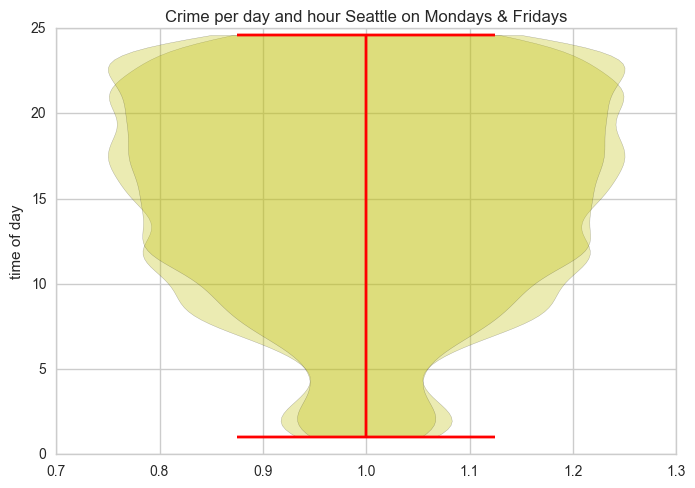

In [85]:
plt.violinplot(monTimeSea)
plt.violinplot(friTimeSea)
plt.ylabel('time of day')
plt.title('Crime per day and hour Seattle on Mondays & Fridays')
plt.show()

#### When comparing Mondays and Fridays we can see a small difference in offenses with a small increase late at night on Fridays. 

#### There is a distribution of crimes per time and day is similar to San Francisco.
### c. Distribution of crimes per district

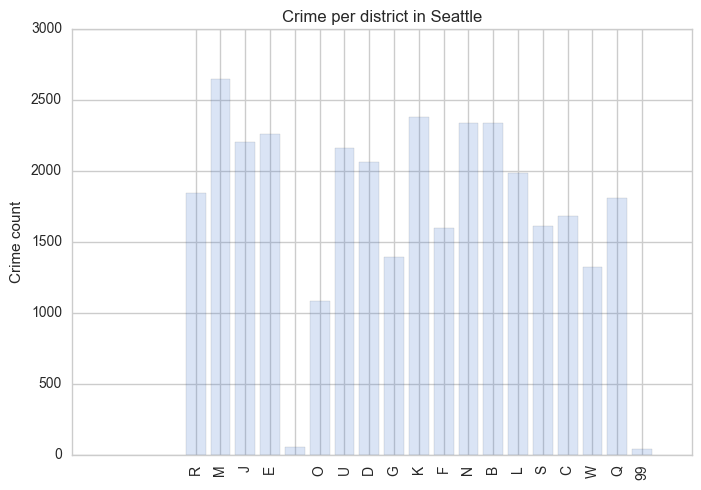

In [86]:
disLabelSea=[]
disCountSea=[]
for k in districtSea:
    disLabelSea.append(k)
    disCountSea.append(districtSea[k])
y_pos = np.arange(len(disLabelSea))
plt.bar(y_pos, disCountSea, align='center', alpha=0.2)
plt.xticks(y_pos, disLabelSea,rotation='vertical')
plt.ylabel('Crime count')
plt.title('Crime per district in Seattle')
plt.show()

#### There are no strong outliers in terms of crimes/district.
#### The distribution of crimes per district varies quite strongly from district O  (with ~ a 1000 crimes) to district M (with more than 2500 crimes). 
#### I ignore the 99 district and the ones for which no district were reported (column 2).

##### I did not take into account the size and populations of districts for a sake of time.

# III Comparison of 10 most occuring crimes in Seattle and San Francisco
## The 2 most occuring crimes in both cities are: theft of objects in car and stolen automobiles
#### I focus on 10 most as the distribution of all type of offenses is quite unclear

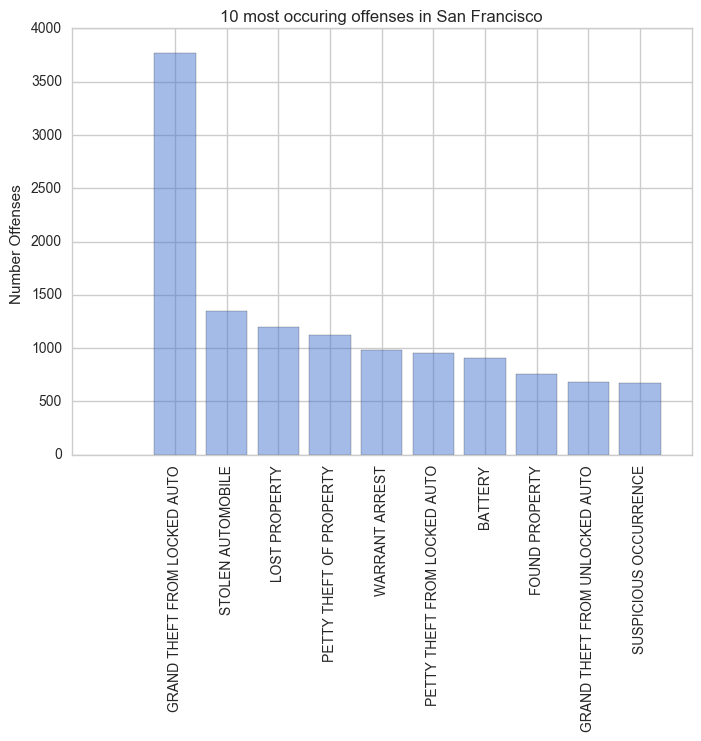

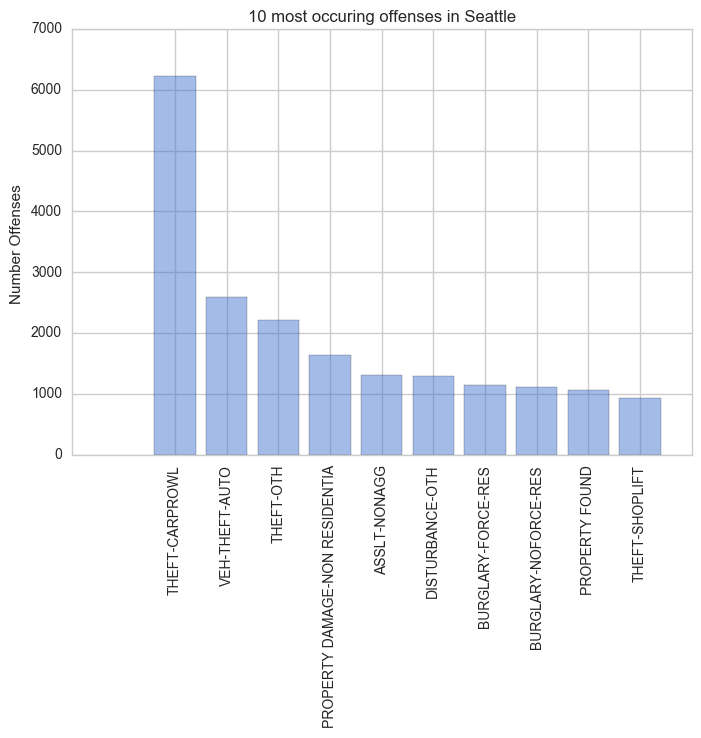

[('THEFT-CARPROWL', 6230), ('VEH-THEFT-AUTO', 2588), ('THEFT-OTH', 2221), ('PROPERTY DAMAGE-NON RESIDENTIA', 1638), ('ASSLT-NONAGG', 1320), ('DISTURBANCE-OTH', 1295), ('BURGLARY-FORCE-RES', 1147), ('BURGLARY-NOFORCE-RES', 1118), ('PROPERTY FOUND', 1069), ('THEFT-SHOPLIFT', 944)]
[('GRAND THEFT FROM LOCKED AUTO', 3766), ('STOLEN AUTOMOBILE', 1350), ('LOST PROPERTY', 1202), ('PETTY THEFT OF PROPERTY', 1125), ('WARRANT ARREST', 980), ('PETTY THEFT FROM LOCKED AUTO', 955), ('BATTERY', 903), ('FOUND PROPERTY', 757), ('GRAND THEFT FROM UNLOCKED AUTO', 681), ('SUSPICIOUS OCCURRENCE', 677)]


In [87]:
###################
#San Francisco top 10 results display
orderDictSF=sorted(crimeDictSF.items(), key=lambda t: t[1])
most10SF={}
most10SF=collections.Counter(crimeDictSF).most_common(10)

barNameSF=[]
barValueSF=[]
for i in range(0,10):
    toParse=str(most10SF[i]).split(',')
    crimeName=toParse[0].lstrip('(\'')
    crimeName=crimeName.strip('\'')
    count=toParse[1].rstrip(')')
    barNameSF.append(crimeName)
    barValueSF.append(int(count))
y_pos = np.arange(len(barNameSF))
plt.bar(y_pos, barValueSF, align='center', alpha=0.5)
plt.xticks(y_pos, barNameSF,rotation='vertical')
plt.ylabel('Number Offenses ')
plt.title('10 most occuring offenses in San Francisco')
plt.show()
    

######################"
#Seattle Top 10 results display
orderDictSea=sorted(crimeDictSea.items(), key=lambda t: t[1])
most10Sea={}
most10Sea=collections.Counter(crimeDictSea).most_common(10)    

barNameSea=[]
barValueSea=[]
for i in range(0,10):
    toParse=str(most10Sea[i]).split(',')
    crimeName=toParse[0].lstrip('(\'')
    crimeName=crimeName.strip('\'')
    count=toParse[1].rstrip(')')
    barNameSea.append(crimeName)
    barValueSea.append(int(count))
y_pos = np.arange(len(barNameSea))
plt.bar(y_pos, barValueSea, align='center', alpha=0.5)
plt.xticks(y_pos, barNameSea,rotation='vertical')
plt.ylabel('Number Offenses ')
plt.title('10 most occuring offenses in Seattle')
plt.show()
print(most10Sea)
print(most10SF)

#### We see that in both cities the commonly occurring offenses are related to theft of cars or objects.
#### In Seattle the most occuring crime is the theft of object in cars ('theft carprowl'), followed by theft of automobiles then other thefts.
#### In San Francisco the most occuring crime is Grand theft from locked auto, followed by stolen automobile, then lost property. 


### https://www.google.com/fusiontables/DataSource?docid=1QwsxMYiE9BvSUPT5LfURv3ap0CeRCZvG8fM32Ipy

### Please look at the following google fusion table for exploration of vehice theft and theft-carprowl in Seattle. 
### For the theft of objects in vehicle (theft-carprowl): the month with most crimes is June and the district with more crime is M.
### For the stolen automobiles, more were stolen in June and in district J.

### This was not done for San Francisco as I was uploaded it later to Google Drive and could not open it anymore with the Google Fusion Tables. 

#### In order to be able to compare the most 2 occuring crimes we should add for San Francisco 'petty theft from locked auto' and 'grand theft from unlocked auto'. 

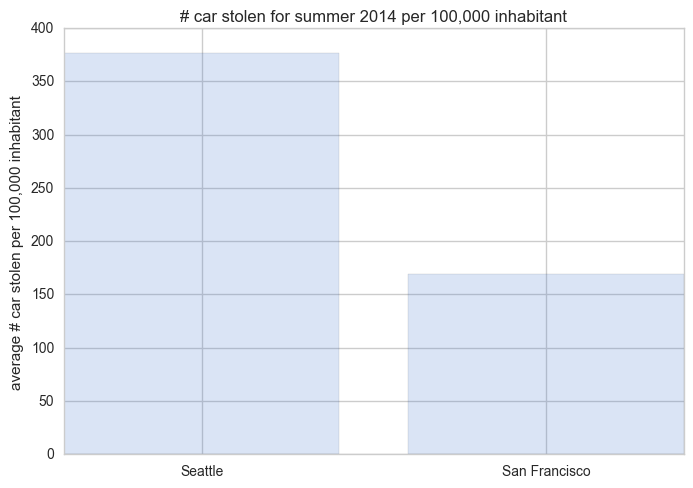

In [92]:
#stolen cars in SF 1360
# veh-theft auto sea 2588
# crime # per 100,000 inhabitant population taken from wikipedia 2015 or 2016 census
dailyRateSFPop=(1360/805235)*100000
dailyRateSeaPop=(2588/686800)*100000

barValueDaily=[]
barValueDaily.append(dailyRateSeaPop)
barValueDaily.append(dailyRateSFPop)
barNameDaily=[]
barNameDaily.append('Seattle')

barNameDaily.append('San Francisco')
y_pos = np.arange(len(barNameDaily))
plt.bar(y_pos, barValueDaily, align='center', alpha=0.2)
plt.xticks(y_pos, barNameDaily)
plt.ylabel('average # car stolen per 100,000 inhabitant')
plt.title('# car stolen for summer 2014 per 100,000 inhabitant')
plt.show()

#### The rate of stolen car per inhabitant is almost double from San Francisco to Seattle

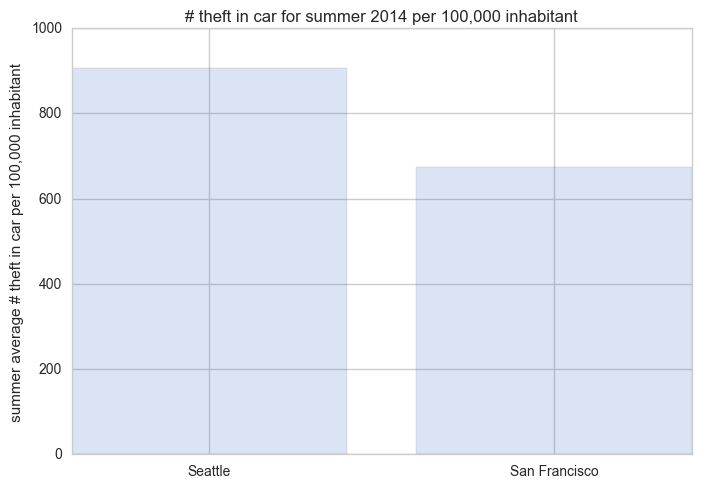

In [93]:
#sea: theft car-prowl 6230

# SF: grd theft from locked auto 3776, petty theft from locked auto 955, grand theft from unlocked auto 681
dailyRateSFPop=((3776+965+681)/805235)*100000
dailyRateSeaPop=(6230/686800)*100000

barValueDaily=[]
barValueDaily.append(dailyRateSeaPop)
barValueDaily.append(dailyRateSFPop)
barNameDaily=[]
barNameDaily.append('Seattle')

barNameDaily.append('San Francisco')
y_pos = np.arange(len(barNameDaily))
plt.bar(y_pos, barValueDaily, align='center', alpha=0.2)
plt.xticks(y_pos, barNameDaily)
plt.ylabel('summer average # theft in car per 100,000 inhabitant')
plt.title('# theft in car for summer 2014 per 100,000 inhabitant')
plt.show()

#### The rate of theft in car is higher in Seattle than San Francisco